In [5]:
import sys
import torch

import os
import matplotlib.pyplot as plt
import numpy as np
from mobile_sam import sam_model_registry, SamPredictor

sam_checkpoint = "C:/Users/gbo10/OneDrive/measurement_paper_images/sam_experiments/mobile_sam.pt"
model_type = "vit_t"

device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
sam.eval()

predictor = SamPredictor(sam)

c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if thi

In [6]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   

In [10]:
from ultralytics import YOLO
from pathlib import Path

weight_path=Path(r"C:\Users\gbo10\OneDrive\measurement_paper_images\results 27-7-2024\best (11).pt")
# Load a pretrained YOLOv8n model
model = YOLO(weight_path)

# Run inference on 'bus.jpg' with arguments



In [11]:
folder_path=Path(r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\rightresized")

model.predict(folder_path, save=True,save_txt=True, imgsz=640, conf=0.5, iou=0.45)



image 1/38 C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\rightresized\GX010067_33_625.jpg_gamma_stabilized_00001.png: 640x640 4 prawn-models, 3074.4ms
image 2/38 C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\rightresized\GX010068_26_666.jpg_gamma_stabilized_00001.png: 640x640 3 prawn-models, 2869.1ms
image 3/38 C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\rightresized\GX010068_27_795.jpg_gamma_stabilized_00001.png: 640x640 2 prawn-models, 2945.4ms
image 4/38 C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\rightresized\GX010069_19_191.jpg_gamma_stabilized_00001.png: 640x640 3 prawn-models, 2769.2ms
image 5/38 C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\rightresized\GX010069_53_796.jpg_gamma_stabilized_00001.png: 640x640 2 prawn-models, 2828.7ms
image 6/38 C:\Users\gbo10\One

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'prawn-model'}
 obb: None
 orig_img: array([[[184, 166,  58],
         [183, 168,  61],
         [187, 175,  76],
         ...,
         [ 60,  72,  61],
         [ 76,  84,  71],
         [ 77,  87,  72]],
 
        [[178, 162,  48],
         [180, 166,  56],
         [186, 174,  80],
         ...,
         [ 61,  69,  63],
         [ 66,  76,  65],
         [ 70,  78,  66]],
 
        [[179, 166,  58],
         [181, 167,  67],
         [183, 171,  72],
         ...,
         [ 58,  66,  60],
         [ 59,  66,  63],
         [ 56,  66,  59]],
 
        ...,
 
        [[178, 169,  83],
         [177, 164,  75],
         [173, 159,  71],
         ...,
         [ 54,  34,  42],
         [ 56,  41,  44],
         [ 56,  44,  43]],
 
        [[178, 165,  77],
         [172, 161,  76],
         [172,

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FH9GrrTUIrnVuHJnXAX0")
project = rf.workspace("prawns").project("amphibina-car")
version = project.version(33)
dataset = version.download("yolov8")


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
   ---------------------------------------- 0.0/76.7 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/76.7 kB 1.4 MB/s eta 0:00:01
   -------------------------------- ------- 61.4/76.7 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 76.7/76.7 kB 714.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/178.7 kB ? eta -:--:--
   ---------------- ----------------------- 71.7/178.7 kB 1.9 MB/s eta 0:00:01
   ------------------------- -------------- 112.6/178.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 178.7/178.7 kB 1.5 MB/s eta 0:00:00
Using cached idna-3.7-py3-none-any.whl (66 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 3.2 MB/s eta 0:00:13
   ---------------------------------------- 0.2/38.8 MB 2.9 MB/s eta 0:00:14
   ---------------------------------------- 0.4/38.8


Extracting Dataset Version Zip to amphibina-car-33 in yolov8:: 100%|██████████| 1511/1511 [00:01<00:00, 921.67it/s]


In [6]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")

Using device: cpu


In [7]:
from ultralytics import YOLO

model=YOLO("C:/Users/gbo10/OneDrive/measurement_paper_images/27-07-2024/best (9).pt")

model.val(data="C:/Users/gbo10/OneDrive/measurement_paper_images/27-07-2024/amphibina-car-33/data.yaml",split='test', save_json=True,plots=True, imgsz=640, conf=0.4)


Ultralytics YOLOv8.2.56  Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
YOLOv8l-pose summary (fused): 287 layers, 44,456,805 parameters, 0 gradients, 168.5 GFLOPs


val: Scanning C:\Users\gbo10\OneDrive\measurement_paper_images\27-07-2024\amphibina-car-33\test\labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:50<00:00, 42.68s/it]


                   all         52         78        0.8      0.513      0.643      0.289       0.94      0.603      0.776       0.77
Speed: 5.2ms preprocess, 3260.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Saving c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\val2\predictions.json...
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\val2


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020E82EB3FD0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,

In [8]:
model.predict("C:/Users/gbo10/OneDrive/measurement_paper_images/27-07-2024/amphibina-car-33/test/images", save=True,save_txt=True, imgsz=640, conf=0.5)


image 1/52 C:\Users\gbo10\OneDrive\measurement_paper_images\27-07-2024\amphibina-car-33\test\images\GX010129_104_196-jpg_gamma_jpg.rf.c595ba248d289fc8627160a907e0c798.jpg: 640x640 1 prawn-model, 2985.2ms
image 2/52 C:\Users\gbo10\OneDrive\measurement_paper_images\27-07-2024\amphibina-car-33\test\images\GX010129_170_411-jpg_gamma_jpg.rf.65262f92444733d1facf58c5f779a232.jpg: 640x640 1 prawn-model, 2854.4ms
image 3/52 C:\Users\gbo10\OneDrive\measurement_paper_images\27-07-2024\amphibina-car-33\test\images\GX010129_172_419-jpg_gamma_jpg.rf.cb14b0d00d7eeb465004ebeaec0cf951.jpg: 640x640 1 prawn-model, 2804.9ms
image 4/52 C:\Users\gbo10\OneDrive\measurement_paper_images\27-07-2024\amphibina-car-33\test\images\GX010129_175_440-jpg_gamma_jpg.rf.469ea1af14665e2c8df3e174fdb211de.jpg: 640x640 1 prawn-model, 2848.6ms
image 5/52 C:\Users\gbo10\OneDrive\measurement_paper_images\27-07-2024\amphibina-car-33\test\images\GX010129_177_446-jpg_gamma_jpg.rf.d40f4666f401960f82d00aa41703413e.jpg: 640x640 1 p

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'prawn-model'}
 obb: None
 orig_img: array([[[ 45,  56,  10],
         [ 51,  62,  16],
         [ 60,  71,  25],
         ...,
         [190, 218, 198],
         [186, 216, 197],
         [182, 212, 193]],
 
        [[ 44,  54,  11],
         [ 49,  60,  14],
         [ 57,  67,  24],
         ...,
         [185, 213, 193],
         [181, 211, 192],
         [178, 208, 189]],
 
        [[ 48,  58,  16],
         [ 52,  62,  19],
         [ 58,  68,  26],
         ...,
         [175, 203, 183],
         [174, 202, 182],
         [174, 202, 182]],
 
        ...,
 
        [[ 56,  42,  43],
         [ 60,  48,  48],
         [ 65,  54,  56],
         ...,
         [ 40,  34,  45],
         [ 33,  29,  41],
         [ 30,  26,  38]],
 
        [[ 61,  47,  48],
         [ 62,  50,  50],
         [ 63,

In [102]:
#resize image to 640x640
from PIL import Image
import cv2

image=cv2.imread("C:/Users/gbo10/OneDrive/measurement_paper_images/image_to_check.png")

image = cv2.resize(image, (640, 640), interpolation = cv2.INTER_AREA)

cv2.imwrite("C:/Users/gbo10/OneDrive/measurement_paper_images/image_to_check.png", image)

True

In [2]:
from ultralytics import RTDETR

model = RTDETR(r"C:\Users\gbo10\OneDrive\research\thesis and paper\right_after_sam.pt")
model.export(format='onnx')


Ultralytics YOLOv8.2.56  Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
rt-detr-l summary: 494 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs

PyTorch: starting from 'C:\Users\gbo10\OneDrive\research\thesis and paper\right_after_sam.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 5) (63.1 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export failure  4.5s: Unsupported: ONNX export of operator get_pool_ceil_padding, input size not accessible. Please feel free to request support or submit a pull request on PyTorch GitHub: https://github.com/pytorch/pytorch/issues  [Caused by the value 'input.4 defined in (%input.4 : Float(*, *, *, *, strides=[3297312, 103041, 321, 1], requires_grad=0, device=cpu) = onnx::Pad[mode="constant"](%449, %476, %452), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0 # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packa

SymbolicValueError: Unsupported: ONNX export of operator get_pool_ceil_padding, input size not accessible. Please feel free to request support or submit a pull request on PyTorch GitHub: https://github.com/pytorch/pytorch/issues  [Caused by the value 'input.4 defined in (%input.4 : Float(*, *, *, *, strides=[3297312, 103041, 321, 1], requires_grad=0, device=cpu) = onnx::Pad[mode="constant"](%449, %476, %452), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0 # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\modules\block.py:114:0
)' (type 'Tensor') in the TorchScript graph. The containing node has kind 'onnx::Pad'.] 
    (node defined in c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\modules\block.py(114): forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1508): _slow_forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1527): _call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1518): _wrapped_call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\tasks.py(580): predict
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\tasks.py(102): forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1508): _slow_forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1527): _call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1518): _wrapped_call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\jit\_trace.py(124): wrapper
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\jit\_trace.py(133): forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1527): _call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1518): _wrapped_call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\jit\_trace.py(1285): _get_trace_graph
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(915): _trace_and_get_graph_from_model
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(1011): _create_jit_graph
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(1135): _model_to_graph
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(1596): _export
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(516): export
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\engine\exporter.py(409): export_onnx
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\engine\exporter.py(137): outer_func
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\engine\exporter.py(306): __call__
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\utils\_contextlib.py(115): decorate_context
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\engine\model.py(591): export
C:\Users\gbo10\AppData\Local\Temp\ipykernel_6892\3577620323.py(4): <module>
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3550): run_code
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3490): run_ast_nodes
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3308): run_cell_async
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\async_helpers.py(129): _pseudo_sync_runner
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3103): _run_cell
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3048): run_cell
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\zmqshell.py(549): run_cell
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\ipkernel.py(429): do_execute
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelbase.py(767): execute_request
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelbase.py(429): dispatch_shell
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelbase.py(523): process_one
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelbase.py(534): dispatch_queue
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py(80): _run
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py(1890): _run_once
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py(596): run_forever
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\asyncio\windows_events.py(316): run_forever
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\tornado\platform\asyncio.py(205): start
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelapp.py(701): start
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\traitlets\config\application.py(1077): launch_instance
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel_launcher.py(17): <module>
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\runpy.py(87): _run_code
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\runpy.py(197): _run_module_as_main
)

    Inputs:
        #0: 449 defined in (%449 : Float(1, 32, 320, 320, strides=[3276800, 102400, 320, 1], requires_grad=0, device=cpu) = onnx::Relu(%input), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0/ultralytics.nn.modules.conv.Conv::stem1/torch.nn.modules.activation.ReLU::act # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\functional.py:1469:0
    )  (type 'Tensor')
        #1: 476 defined in (%476 : Long(8, strides=[1], device=cpu) = onnx::Cast[to=7](%475), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0 # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\modules\block.py:114:0
    )  (type 'Tensor')
        #2: 452 defined in (%452 : NoneType = prim::Constant(), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0
    )  (type 'NoneType')
    Outputs:
        #0: input.4 defined in (%input.4 : Float(*, *, *, *, strides=[3297312, 103041, 321, 1], requires_grad=0, device=cpu) = onnx::Pad[mode="constant"](%449, %476, %452), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0 # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\modules\block.py:114:0
    )  (type 'Tensor')

: 

In [67]:
# export to onnx    



Ultralytics YOLOv8.0.238 🚀 Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
rt-detr-l summary: 494 layers, 31985795 parameters, 0 gradients, 103.4 GFLOPs

PyTorch: starting from 'C:\Users\gbo10\OneDrive\measurement_paper_images\sam_experiments\right_round_best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 5) (63.1 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export failure ❌ 5.1s: Unsupported: ONNX export of operator get_pool_ceil_padding, input size not accessible. Please feel free to request support or submit a pull request on PyTorch GitHub: https://github.com/pytorch/pytorch/issues  [Caused by the value 'input.4 defined in (%input.4 : Float(*, *, *, *, strides=[3297312, 103041, 321, 1], requires_grad=0, device=cpu) = onnx::Pad[mode="constant"](%449, %476, %452), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0 # c:\Users\gbo10\Videos\research\counting_research_algorithms\.ve

SymbolicValueError: Unsupported: ONNX export of operator get_pool_ceil_padding, input size not accessible. Please feel free to request support or submit a pull request on PyTorch GitHub: https://github.com/pytorch/pytorch/issues  [Caused by the value 'input.4 defined in (%input.4 : Float(*, *, *, *, strides=[3297312, 103041, 321, 1], requires_grad=0, device=cpu) = onnx::Pad[mode="constant"](%449, %476, %452), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0 # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\modules\block.py:77:0
)' (type 'Tensor') in the TorchScript graph. The containing node has kind 'onnx::Pad'.] 
    (node defined in c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\modules\block.py(77): forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1508): _slow_forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1527): _call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1518): _wrapped_call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\tasks.py(495): predict
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\tasks.py(42): forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1508): _slow_forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1527): _call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1518): _wrapped_call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\jit\_trace.py(124): wrapper
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\jit\_trace.py(133): forward
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1527): _call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\modules\module.py(1518): _wrapped_call_impl
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\jit\_trace.py(1285): _get_trace_graph
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(915): _trace_and_get_graph_from_model
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(1011): _create_jit_graph
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(1135): _model_to_graph
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(1596): _export
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\onnx\utils.py(516): export
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\engine\exporter.py(335): export_onnx
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\engine\exporter.py(117): outer_func
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\engine\exporter.py(256): __call__
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\utils\_contextlib.py(115): decorate_context
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\engine\model.py(328): export
C:\Users\gbo10\AppData\Local\Temp\ipykernel_20968\2475616137.py(2): <module>
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3550): run_code
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3490): run_ast_nodes
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3308): run_cell_async
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\async_helpers.py(129): _pseudo_sync_runner
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3103): _run_cell
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\IPython\core\interactiveshell.py(3048): run_cell
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\zmqshell.py(549): run_cell
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\ipkernel.py(429): do_execute
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelbase.py(767): execute_request
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelbase.py(429): dispatch_shell
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelbase.py(523): process_one
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelbase.py(534): dispatch_queue
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py(80): _run
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py(1890): _run_once
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py(596): run_forever
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\asyncio\windows_events.py(316): run_forever
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\tornado\platform\asyncio.py(205): start
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel\kernelapp.py(701): start
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\traitlets\config\application.py(1077): launch_instance
c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ipykernel_launcher.py(17): <module>
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\runpy.py(87): _run_code
C:\Users\gbo10\AppData\Local\Programs\Python\Python39\lib\runpy.py(197): _run_module_as_main
)

    Inputs:
        #0: 449 defined in (%449 : Float(1, 32, 320, 320, strides=[3276800, 102400, 320, 1], requires_grad=0, device=cpu) = onnx::Relu(%input), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0/ultralytics.nn.modules.conv.Conv::stem1/torch.nn.modules.activation.ReLU::act # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\torch\nn\functional.py:1469:0
    )  (type 'Tensor')
        #1: 476 defined in (%476 : Long(8, strides=[1], device=cpu) = onnx::Cast[to=7](%475), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0 # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\modules\block.py:77:0
    )  (type 'Tensor')
        #2: 452 defined in (%452 : NoneType = prim::Constant(), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0
    )  (type 'NoneType')
    Outputs:
        #0: input.4 defined in (%input.4 : Float(*, *, *, *, strides=[3297312, 103041, 321, 1], requires_grad=0, device=cpu) = onnx::Pad[mode="constant"](%449, %476, %452), scope: ultralytics.nn.tasks.RTDETRDetectionModel::/ultralytics.nn.modules.block.HGStem::model.0 # c:\Users\gbo10\Videos\research\counting_research_algorithms\.venv\lib\site-packages\ultralytics\nn\modules\block.py:77:0
    )  (type 'Tensor')

In [2]:
import numpy as np

def yolo_to_box(yolo_line, img_width, img_height):
    # YOLO format: class x_center y_center width height (normalized)
    yolo_data = yolo_line.strip().split()
    x_center, y_center, width, height = map(float, yolo_data[1:])

    # Convert to pixel coordinates
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate top-left and bottom-right coordinates
    x_min = int(x_center - width / 2)
    y_min = int(y_center - height / 2)
    x_max = int(x_center + width / 2)
    y_max = int(y_center + height / 2)

    return np.array([x_min, y_min, x_max, y_max])

def convert_yolo_to_boxes(yolo_file, img_width, img_height):
    boxes = []
    with open(yolo_file, 'r') as file:
        for line in file:
            box = yolo_to_box(line, img_width, img_height)
            boxes.append(box)
    return boxes

# Example usage
yolo_file = 'C:/Users/gbo10/Videos/data-science/Research-counting-algorithms/runs/detect/predict7/labels/GX010080_238_3392-jpg_gamma_jpg.rf.d7478d09dc9575d906be2aa0096bd429.txt'
img_width = 640  # Image width
img_height = 640  # Image height

boxes = convert_yolo_to_boxes(yolo_file, img_width, img_height)
for box in boxes:
    print(f"input_box = np.array({box})")



input_box = np.array([136 311 215 391])
input_box = np.array([456 143 517 286])
input_box = np.array([335 331 430 471])
input_box = np.array([336   0 393 100])
input_box = np.array([135 156 211 323])
input_box = np.array([417 440 539 547])
input_box = np.array([252 147 353 257])
input_box = np.array([ 41  45 150 151])


In [3]:
boxes

[array([136, 311, 215, 391]),
 array([456, 143, 517, 286]),
 array([335, 331, 430, 471]),
 array([336,   0, 393, 100]),
 array([135, 156, 211, 323]),
 array([417, 440, 539, 547]),
 array([252, 147, 353, 257]),
 array([ 41,  45, 150, 151])]

In [4]:
#make boxes a list of lists
boxes = [list(box) for box in boxes]


In [5]:
boxes

[[136, 311, 215, 391],
 [456, 143, 517, 286],
 [335, 331, 430, 471],
 [336, 0, 393, 100],
 [135, 156, 211, 323],
 [417, 440, 539, 547],
 [252, 147, 353, 257],
 [41, 45, 150, 151]]

In [6]:
boxes=np.array(boxes)

In [9]:
from ultralytics import SAM

# Load a model
model = SAM("sam2_t.pt")

# Display model information (optional)
model.info()

# Segment with bounding box prompt
results = model(r"C:\Users\gbo10\OneDrive\measurement_paper_images\roboflow inital data\test with seperation\images\right round\GX010080_238_3392-jpg_gamma_jpg.rf.d7478d09dc9575d906be2aa0096bd429.jpg", bboxes=boxes)

Model summary: 422 layers, 38,945,986 parameters, 38,945,986 gradients

image 1/1 C:\Users\gbo10\OneDrive\measurement_paper_images\roboflow inital data\test with seperation\images\right round\GX010080_238_3392-jpg_gamma_jpg.rf.d7478d09dc9575d906be2aa0096bd429.jpg: 1024x1024 3321.9ms
Speed: 52.9ms preprocess, 3321.9ms inference, 10.1ms postprocess per image at shape (1, 3, 1024, 1024)


In [11]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7'}
 obb: None
 orig_img: array([[[124, 135, 132],
         [123, 134, 131],
         [123, 132, 129],
         ...,
         [155, 124,  61],
         [153, 121,  56],
         [150, 118,  53]],
 
        [[120, 129, 126],
         [120, 130, 124],
         [121, 128, 125],
         ...,
         [156, 125,  62],
         [155, 122,  59],
         [152, 120,  55]],
 
        [[114, 121, 116],
         [115, 123, 116],
         [116, 122, 117],
         ...,
         [160, 129,  66],
         [160, 127,  64],
         [158, 125,  62]],
 
        ...,
 
        [[ 67,  60,  40],
         [ 67,  60,  40],
         [ 67,  59,  42],
         ...,
         [ 45,   6,  28],
         [ 46,   7,  29],
         [ 47,   8,  30]],
 
        [[ 68,  61,  41],
         [ 68,  61,  41],
       

In [12]:
#resize imge to 640x640
from PIL import Image
import cv2

image=cv2.imread(r"C:\Users\gbo10\OneDrive\measurement_paper_images\test images\gamma\GX010080_238_3392.jpg_gamma.jpg")

image = cv2.resize(image, (640, 640), interpolation = cv2.INTER_AREA)

cv2.imwrite(r"GX010080_238_3392.jpg_gamma.jpg", image)



True

In [14]:
model = SAM("mobile_sam.pt")

100%|██████████| 38.8M/38.8M [00:10<00:00, 3.96MB/s]


In [15]:
boxes_ndarray = boxes

# Run inference
results = model(image, bboxes=boxes, save=True)


0: 1024x1024 1580.5ms
Speed: 45.4ms preprocess, 1580.5ms inference, 14.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\segment\predict3


: 

In [22]:
boxes_ndarray.reshape(1, *boxes_ndarray.shape)


array([[[136, 311, 215, 391],
        [456, 143, 517, 286],
        [335, 331, 430, 471],
        [336,   0, 393, 100],
        [135, 156, 211, 323],
        [417, 440, 539, 547],
        [252, 147, 353, 257],
        [ 41,  45, 150, 151]]])

In [24]:
boxes_ndarray.shape

(8, 4)

In [27]:
original_array = np.array([
    [136, 311, 215, 391],
    [456, 143, 517, 286],
    [335, 331, 430, 471],
    [336, 0, 393, 100],
    [135, 156, 211, 323],
    [417, 440, 539, 547],
    [252, 147, 353, 257],
    [41, 45, 150, 151]
])

In [31]:
from ..sam.predict import Predictor


ImportError: attempted relative import with no known parent package

In [30]:
results = model(source=image, bboxes=original_array,save=True,        multimask_output=True,
)

SyntaxError: '[31m[1mmultimask_output[0m' is not a valid YOLO argument. 

    Arguments received: ['yolo', '--f=c:\\Users\\gbo10\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-18620nXRMx8V2DaK6.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'obb', 'segment', 'pose', 'classify'}
                MODE (required) is one of {'benchmark', 'track', 'val', 'train', 'export', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLOv8n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolov8n-cls.pt format=onnx imgsz=224,128

    5. Explore your datasets using semantic search and SQL with a simple GUI powered by Ultralytics Explorer API
        yolo explorer data=data.yaml model=yolov8n.pt
    
    6. Streamlit real-time object detection on your webcam with Ultralytics YOLOv8
        yolo streamlit-predict
        
    7. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg

    Docs: https://docs.ultralytics.com
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)

In [87]:
import cv2

image = cv2.imread('C:/Users/gbo10/OneDrive/measurement_paper_images/to colab/test with seperation/images/right round/GX010080_238_3392-jpg_gamma_jpg.rf.d7478d09dc9575d906be2aa0096bd429.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image)

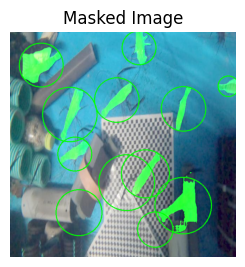

In [86]:
masks=[]

for input_box in boxes:
    mask, _, _ = predictor.predict(
       
        box=input_box[None, :  ],
        
    )
    masks.append(mask)

for mask in masks:
    # Combine all three channels into one mask
    single_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    # Create a colored mask for visualization
    color_mask = np.zeros_like(image)
    color_mask[single_mask == 255] = [0, 255, 0]  # Green color
    # Combine the colored mask with the image
    image = cv2.addWeighted(image, 1, color_mask, 0.5, 0)
#show the masks on the same image


# Display the original and masked images

plt.subplot(1, 2, 2)
plt.title('Masked Image')
plt.imshow(image)
plt.axis('off')

plt.show()

In [ ]:
import cv2

image = cv2.imread('C:/Users/gbo10/OneDrive/measurement_paper_images/to colab/test with seperation/images/right round/GX010080_238_3392-jpg_gamma_jpg.rf.d7478d09dc9575d906be2aa0096bd429.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image)

16


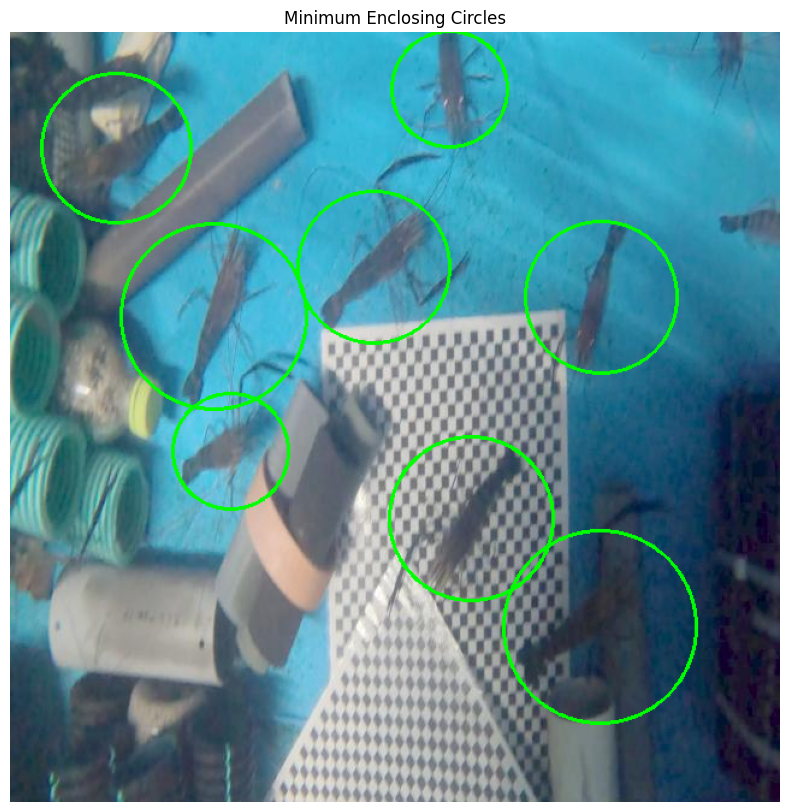

In [88]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt
from random import randint, shuffle

# Defining infinity
INF = 1e18

# Structure to represent a 2D point
class Point:
    def __init__(self, X=0, Y=0) -> None:
        self.X = X
        self.Y = Y

# Structure to represent a 2D circle
class Circle:
    def __init__(self, c=Point(), r=0) -> None:    
        self.C = c
        self.R = r

# Function to return the euclidean distance between two points
def dist(a, b):
    return sqrt((a.X - b.X) ** 2 + (a.Y - b.Y) ** 2)

# Function to check whether a point lies inside or on the boundaries of the circle
def is_inside(c, p):
    return dist(c.C, p) <= c.R

# Helper method to get a circle defined by 3 points
def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return Point((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

# Function to return the smallest circle that intersects 2 points
def circle_from1(A, B):
    C = Point((A.X + B.X) / 2.0, (A.Y + B.Y) / 2.0)
    return Circle(C, dist(A, B) / 2.0)

# Function to return a unique circle that intersects three points
def circle_from2(A, B, C):
    I = get_circle_center(B.X - A.X, B.Y - A.Y, C.X - A.X, C.Y - A.Y)
    I.X += A.X
    I.Y += A.Y
    return Circle(I, dist(I, A))

# Function to check whether a circle encloses the given points
def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

# Function to return the minimum enclosing circle for N <= 3
def min_circle_trivial(P):
    assert len(P) <= 3
    if not P:
        return Circle()
    elif len(P) == 1:
        return Circle(P[0], 0)
    elif len(P) == 2:
        return circle_from1(P[0], P[1])
    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            if is_valid_circle(c, P):
                return c
    return circle_from2(P[0], P[1], P[2])

# Returns the MEC using Welzl's algorithm
def welzl_helper(P, R, n):
    if n == 0 or len(R) == 3:
        return min_circle_trivial(R)
    idx = randint(0, n - 1)
    p = P[idx]
    P[idx], P[n - 1] = P[n - 1], P[idx]
    d = welzl_helper(P, R.copy(), n - 1)
    if is_inside(d, p):
        return d
    R.append(p)
    return welzl_helper(P, R.copy(), n - 1)

def welzl(P):
    P_copy = P.copy()
    shuffle(P_copy)
    return welzl_helper(P_copy, [], len(P_copy))

# Assuming you have multiple masks as a list of 3D numpy arrays (3, height, width)
def get_main_body_mask(mask):
    # Combine all three channels into one mask
    combined_mask = np.any(mask, axis=0).astype(np.uint8) * 255
    return combined_mask

# Function to filter out the claw based on heuristic
def filter_out_claw(contours):
    # Assuming the largest contour is the body without the claw
    main_body_contour = max(contours, key=cv2.contourArea)
    return main_body_contour

# Load the masks
# Replace with your mask generation logic
for input_box in boxes:
    mask, _, _ = predictor.predict(
       
        box=input_box[None, :  ],
        
    )
    masks.append(mask)


# Create a copy of the original image to draw masks on
print(len(masks))
# Process each mask individually
for mask in masks:
    # Get the main body mask
    main_body_mask = get_main_body_mask(mask)

    # Find contours in the main body mask
    contours, _ = cv2.findContours(main_body_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out the claw
    main_body_contour = filter_out_claw(contours)

    # Convert contour points to list of Point objects
    points = [Point(p[0][0], p[0][1]) for p in main_body_contour]

    # Apply Welzl's algorithm to find the minimum enclosing circle
    mec = welzl(points)

    # Draw the circle on the original image
    center = (int(mec.C.X), int(mec.C.Y))
    radius = int(mec.R)
    cv2.circle(image, center, radius, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Minimum Enclosing Circles')
plt.axis('off')
plt.show()


4
1
1
1
1
1
1
1
6
1


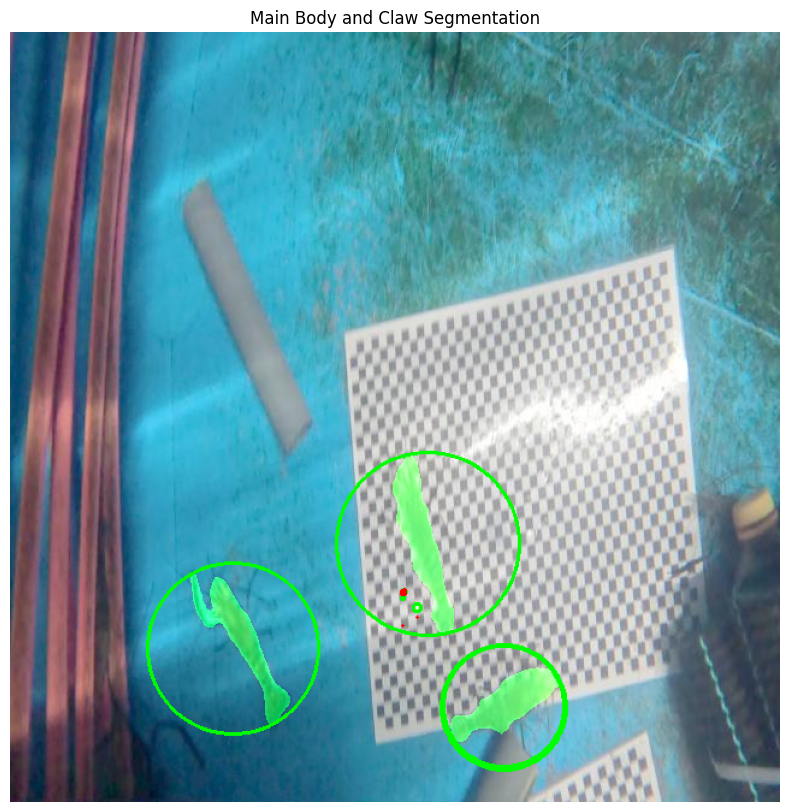

In [56]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import sqrt, pi
from random import randint, shuffle

# Defining infinity
INF = 1e18

# Structure to represent a 2D point
class Point:
    def __init__(self, X=0, Y=0) -> None:
        self.X = X
        self.Y = Y

# Structure to represent a 2D circle
class Circle:
    def __init__(self, c=Point(), r=0) -> None:    
        self.C = c
        self.R = r

# Function to return the euclidean distance between two points
def dist(a, b):
    return sqrt((a.X - b.X) ** 2 + (a.Y - b.Y) ** 2)

# Function to check whether a point lies inside or on the boundaries of the circle
def is_inside(c, p):
    return dist(c.C, p) <= c.R

# Helper method to get a circle defined by 3 points
def get_circle_center(bx, by, cx, cy):
    B = bx * bx + by * by
    C = cx * cx + cy * cy
    D = bx * cy - by * cx
    return Point((cy * B - by * C) / (2 * D), (bx * C - cx * B) / (2 * D))

# Function to return the smallest circle that intersects 2 points
def circle_from1(A, B):
    C = Point((A.X + B.X) / 2.0, (A.Y + B.Y) / 2.0)
    return Circle(C, dist(A, B) / 2.0)

# Function to return a unique circle that intersects three points
def circle_from2(A, B, C):
    I = get_circle_center(B.X - A.X, B.Y - A.Y, C.X - A.X, C.Y - A.Y)
    I.X += A.X
    I.Y += A.Y
    return Circle(I, dist(I, A))

# Function to check whether a circle encloses the given points
def is_valid_circle(c, P):
    for p in P:
        if not is_inside(c, p):
            return False
    return True

# Function to return the minimum enclosing circle for N <= 3
def min_circle_trivial(P):
    assert len(P) <= 3
    if not P:
        return Circle()
    elif len(P) == 1:
        return Circle(P[0], 0)
    elif len(P) == 2:
        return circle_from1(P[0], P[1])
    for i in range(3):
        for j in range(i + 1, 3):
            c = circle_from1(P[i], P[j])
            if is_valid_circle(c, P):
                return c
    return circle_from2(P[0], P[1], P[2])

# Returns the MEC using Welzl's algorithm
def welzl_helper(P, R, n):
    if n == 0 or len(R) == 3:
        return min_circle_trivial(R)
    idx = randint(0, n - 1)
    p = P[idx]
    P[idx], P[n - 1] = P[n - 1], P[idx]
    d = welzl_helper(P, R.copy(), n - 1)
    if is_inside(d, p):
        return d
    R.append(p)
    return welzl_helper(P, R.copy(), n - 1)

def welzl(P):
    P_copy = P.copy()
    shuffle(P_copy)
    return welzl_helper(P_copy, [], len(P_copy))

# Function to extract main body excluding the claw
def extract_main_body_and_claw(mask):
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))   

    if len(contours) == 0:
        return None, None

    # Assuming the largest contour is the body including the claw
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Calculate the area of the largest contour
    largest_area = cv2.contourArea(largest_contour)
    
    # Separate contours into potential main body and claw
    main_body_contour = None
    claw_contour = None
    
    for cnt in contours:
        if cv2.contourArea(cnt) > largest_area * 0.1:  # Assuming claw is significantly smaller
            main_body_contour = cnt
        else:
            claw_contour = cnt
    
    return main_body_contour, claw_contour

# Function to get the main body mask from the 3D mask
def get_main_body_mask(mask):
    return np.any(mask, axis=0).astype(np.uint8) * 255

# Load the image and the corresponding masks
masks=masks
print(len(masks))
# Process each mask individually
for mask in masks:
    
    single_channel_mask = get_main_body_mask(mask)
    
    # Apply thresholding to isolate the main body
    _, thresh_mask = cv2.threshold(single_channel_mask, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the thresholded mask
    contours, _ = cv2.findContours(thresh_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        continue
    for cnt in contours:
       
        x, y, w, h = cv2.boundingRect(cnt)
        cropped_mask = thresh_mask[y:y+h, x:x+w]
        
        main_body_contour, claw_contour = extract_main_body_and_claw(cropped_mask)

        if main_body_contour is not None:
            # Convert contour points to list of Point objects
            points = [Point(p[0][0], p[0][1]) for p in main_body_contour]
            
            # Apply Welzl's algorithm to find the minimum enclosing circle
            mec = welzl(points)
            
            # Adjust the circle position according to the original image
            center = (int(mec.C.X) + x, int(mec.C.Y) + y)
            radius = int(mec.R)
            cv2.circle(image, center, radius, (0, 255, 0), 2)
        
        if claw_contour is not None:
            # Visualize the claw separately
            cv2.drawContours(image, [claw_contour + np.array([[x, y]])], -1, (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Main Body and Claw Segmentation')
plt.axis('off')
plt.show()
